In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
hotel = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv") #creates dataframe


hotel.head(3)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [61]:
hotel.shape


(119390, 32)

EDA stands for Exploratory Data Analysis. It's the process of examining and understanding a dataset before you start modeling or drawing conclusions.Also helps to understand structure, patterns, and relationships in your data.

1.Descriptive Analysis

2.Correlation Analysis

3.Check imbalance in data

Feature Names and its Datatypes

In [11]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Data Spliting
Select and separately store Numerical and Categorical features in different variables.(identifying whhich col are numerical ,which are catagorical)

In [12]:
##Selecting numerical features
numerical_data = hotel.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 20 numerical features: 

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [13]:
#Selecting categoricalfeatures
categorical_data=hotel.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} catagorical features:', '\n')
print(categorical_features)

There are 12 catagorical features: 

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


1)Descriptive Analysis-
In descriptive Analysis we analysis each variable separately to get inference about the feature.

Summary satistics of Numerical Features

In [14]:

numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Summary satistics of Categorical features

In [15]:
categorical_data.describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


Variance of each numerical features

In [16]:
numerical_data.var()

,0
is_canceled,0.233210
lead_time,11419.721511
arrival_date_year,0.500522
arrival_date_week_number,185.099790
arrival_date_day_of_month,77.102966
stays_in_weekend_nights,0.997229
stays_in_week_nights,3.641554
adults,0.335543
children,0.158851
babies,0.009494


Skew in numerical features
📐 What is Skewness? Skewness measures the asymmetry of the distribution of a dataset.

Skewness = 0 → Perfectly symmetrical (e.g., normal distribution)

Skewness < 0 → Left-skewed (long tail on the left)

Skewness > 0 → Right-skewed (long tail on the right)

It helps you understand how balanced your data is an

In [17]:
numerical_data.skew()

,0
is_canceled,0.536678
lead_time,1.346550
arrival_date_year,-0.232583
arrival_date_week_number,-0.010014
arrival_date_day_of_month,-0.002000
stays_in_weekend_nights,1.380046
stays_in_week_nights,2.862249
adults,18.317805
children,4.112590
babies,24.646545


Histograms and Box Plot
To find the distributions and outlier in the each feature

Histograms

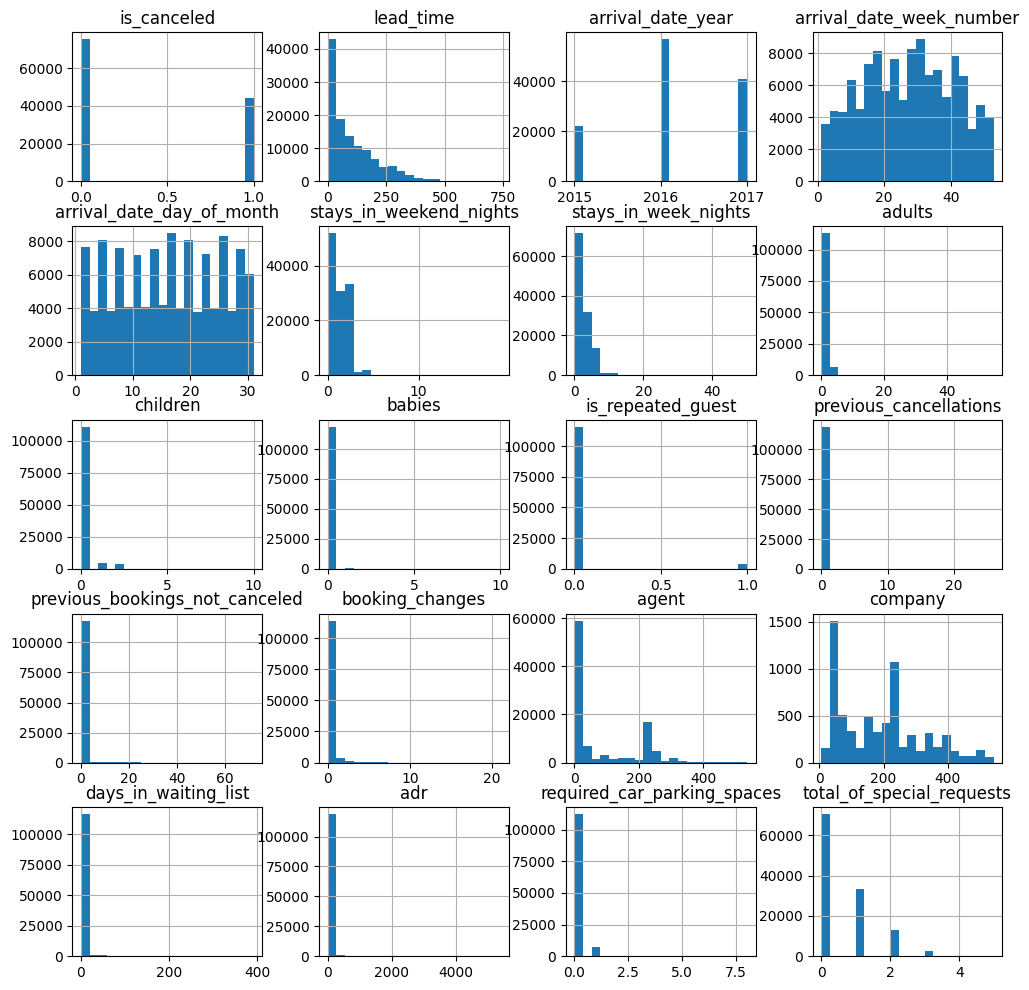

In [18]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

Box Plot

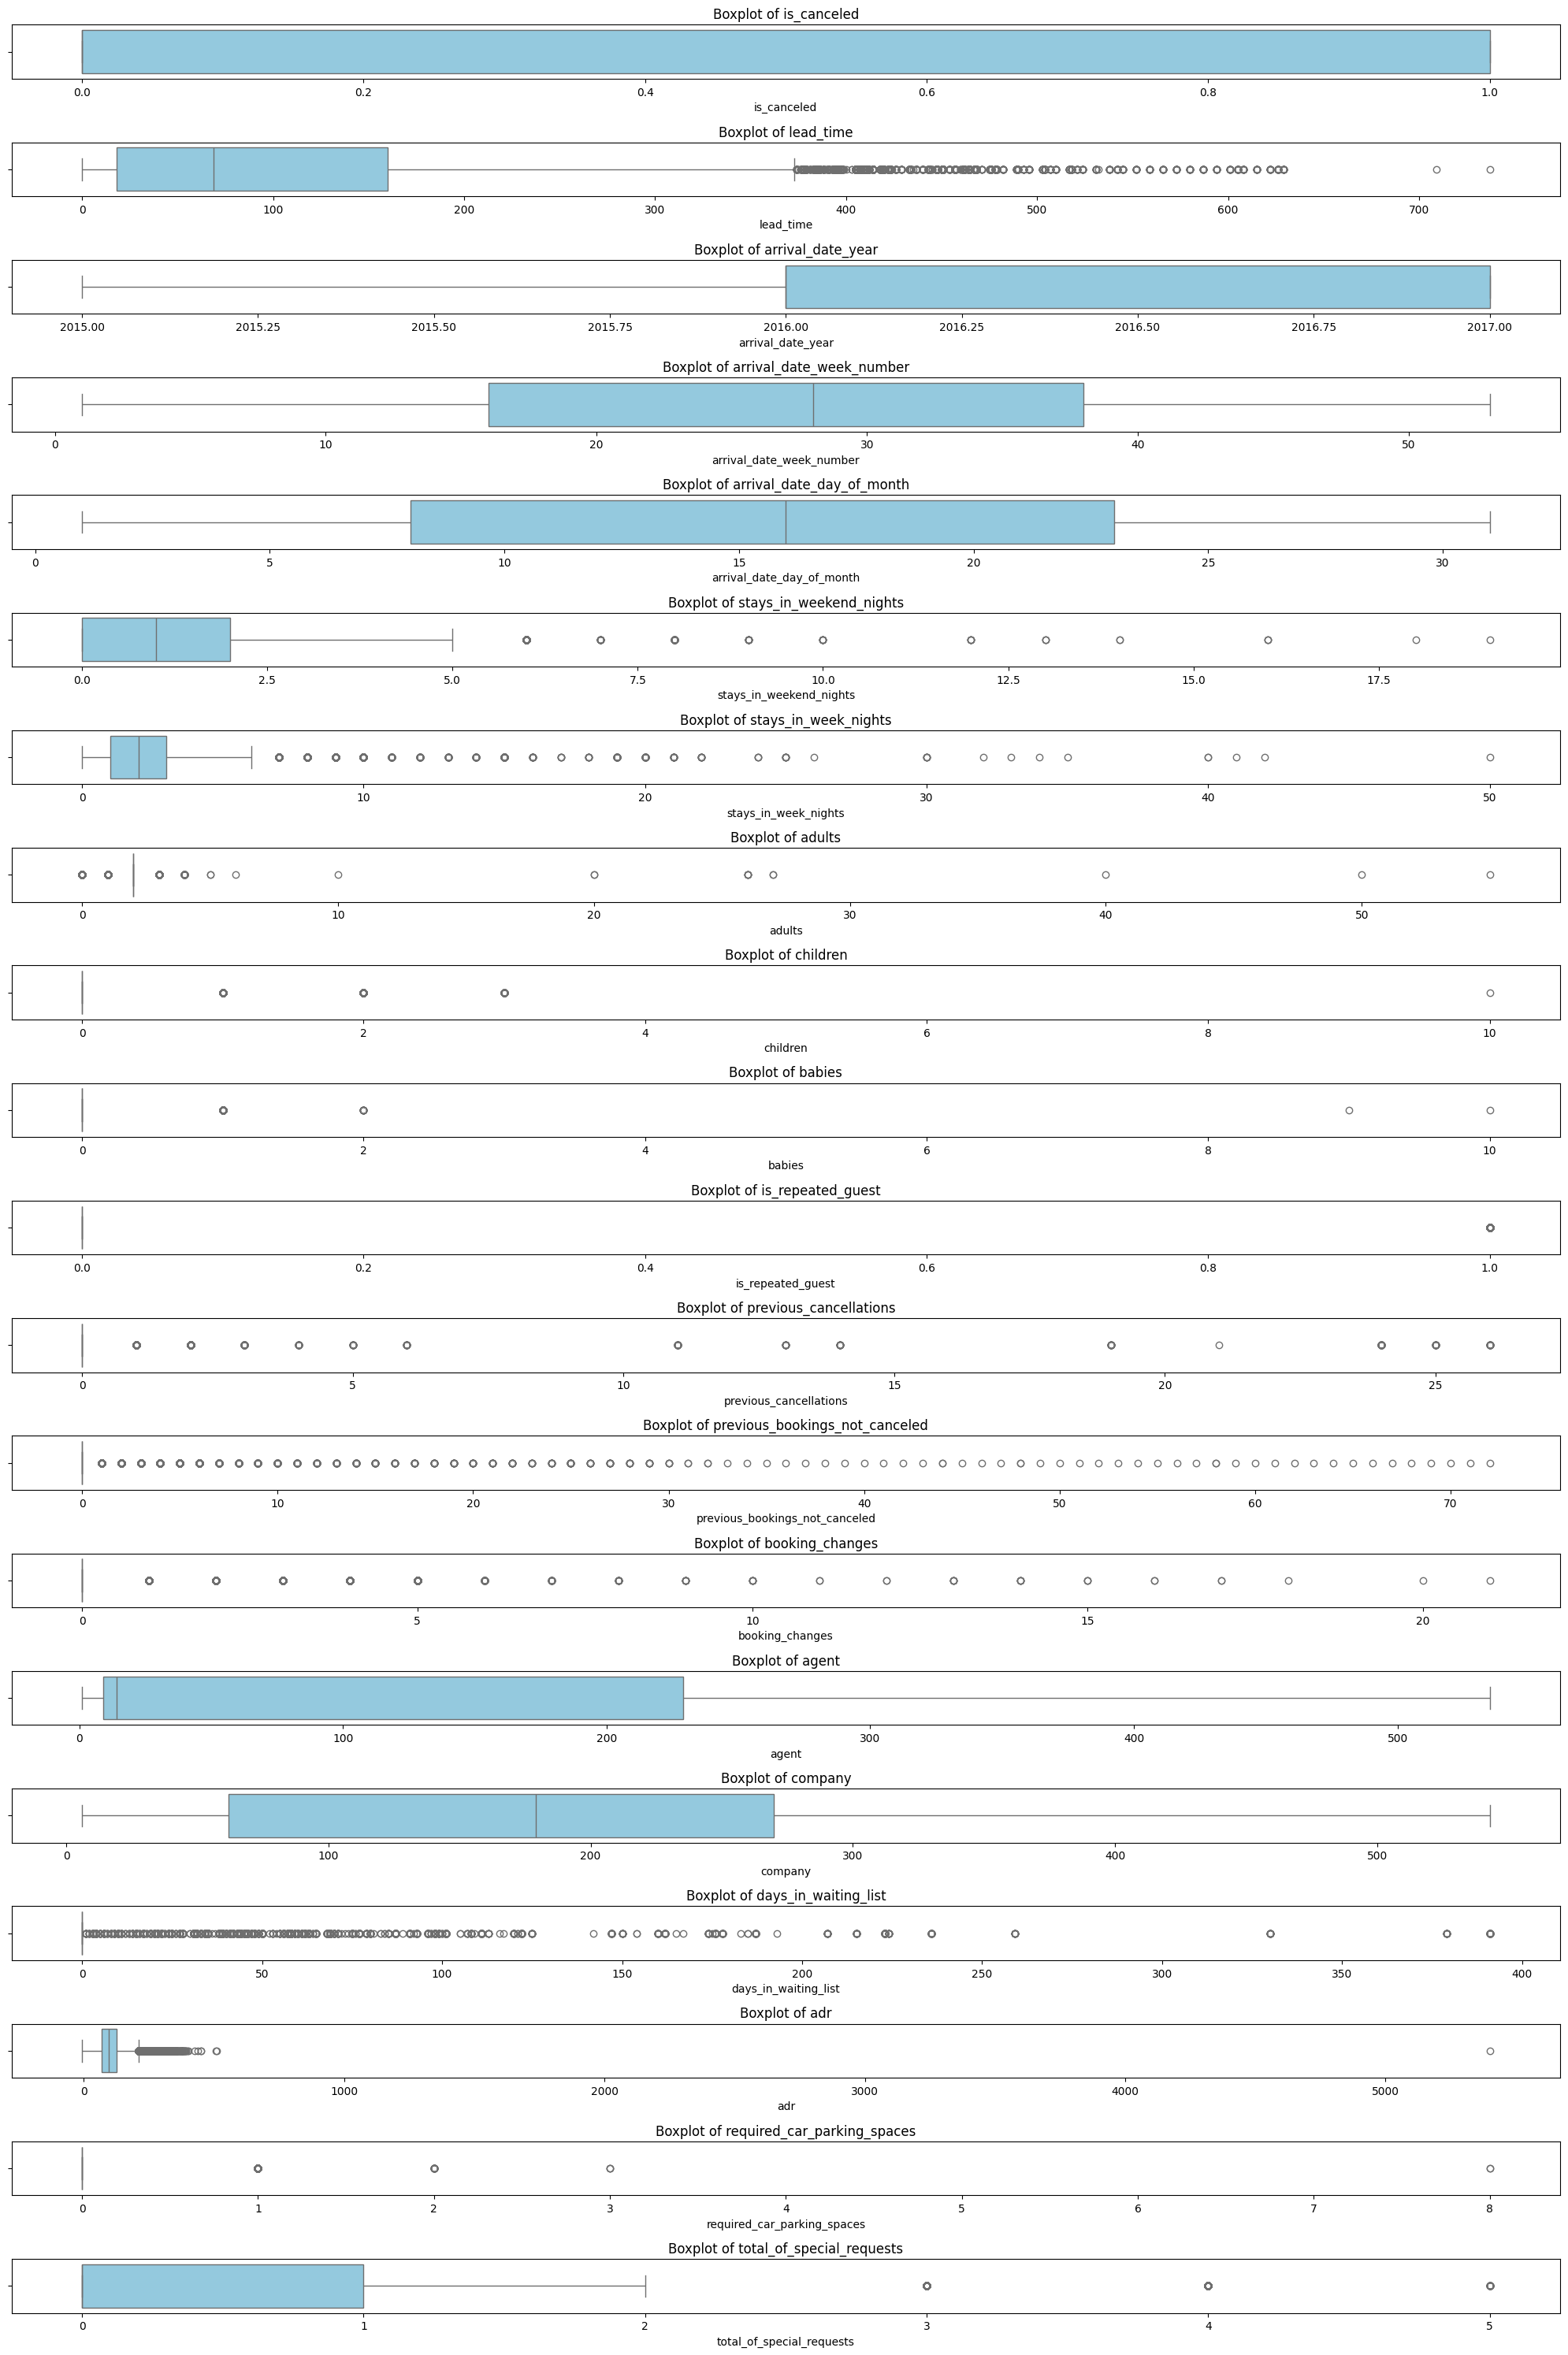

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for boxplot analysis
numeric_cols = hotel.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=hotel[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

Number Unique values in each feature

Number Unique values in numerical feature

In [20]:
numerical_data.nunique()

,0
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14
children,5
babies,5


Missing Values

In [21]:
numerical_data.isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4
babies,0


Categorical Features

No of unique values in each categorical feature

In [22]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

hotel                        2
arrival_date_month          12
meal                         5
country                    177
market_segment               8
distribution_channel         5
reserved_room_type          10
assigned_room_type          12
deposit_type                 3
customer_type                4
reservation_status           3
reservation_status_date    926
dtype: int64


Barplot of unique value counts in every categorical features

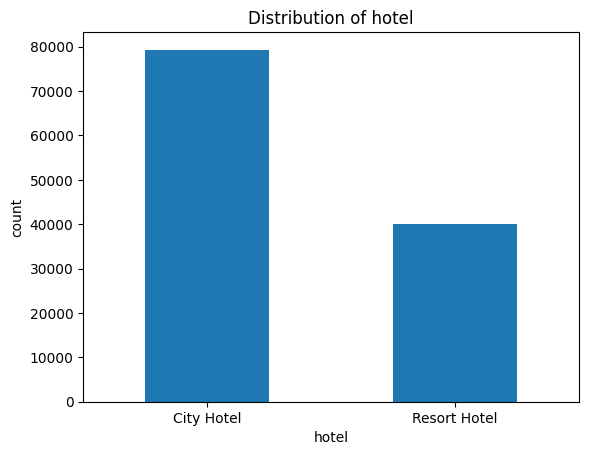

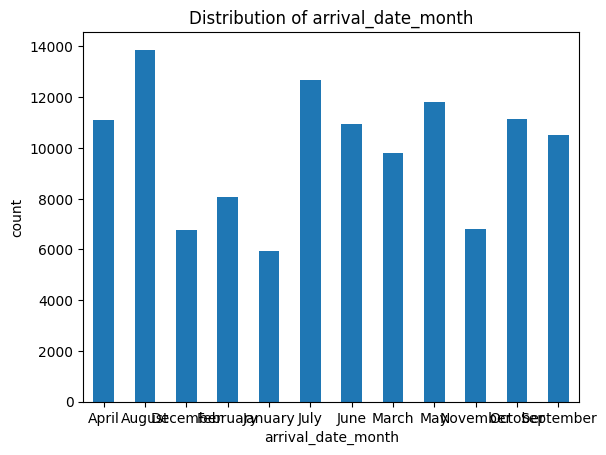

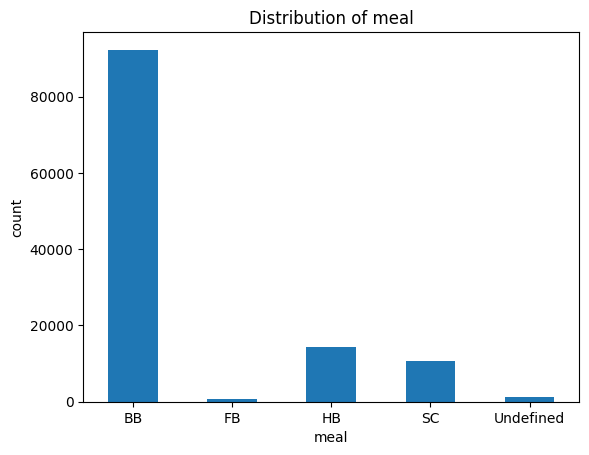

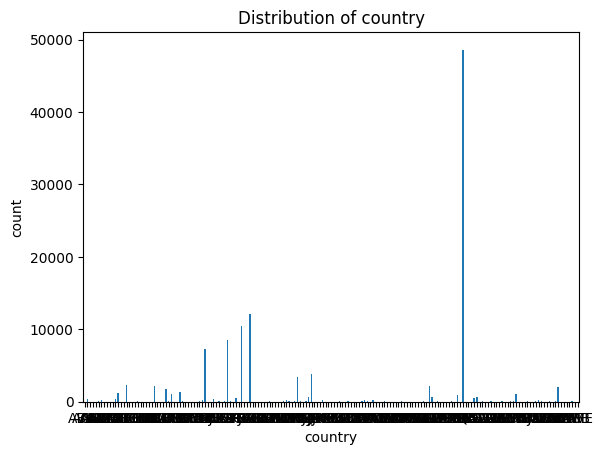

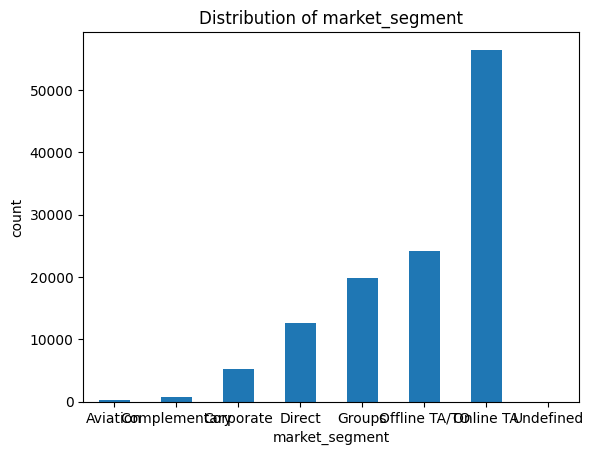

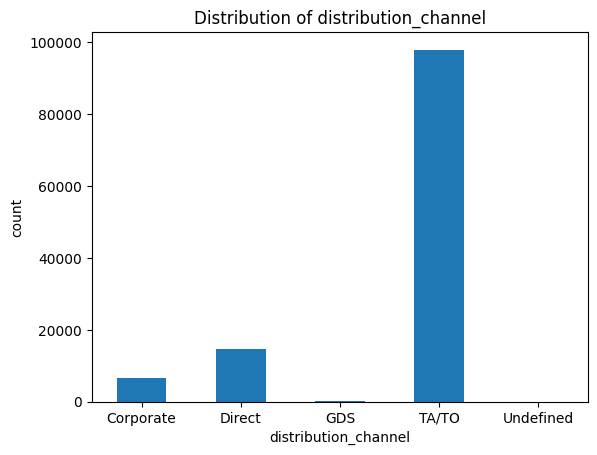

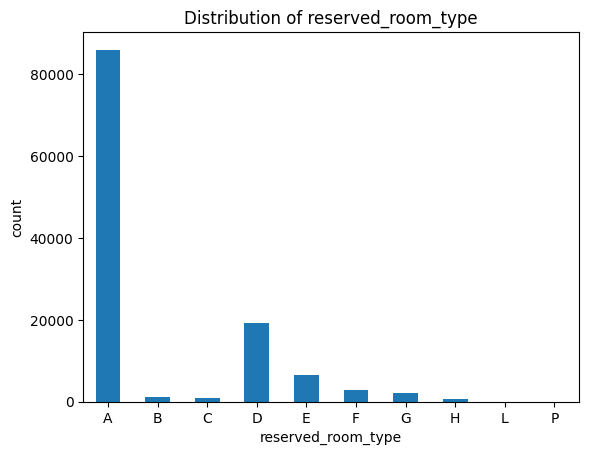

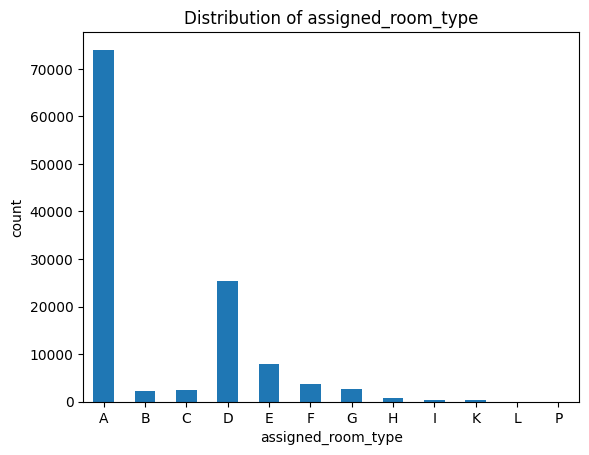

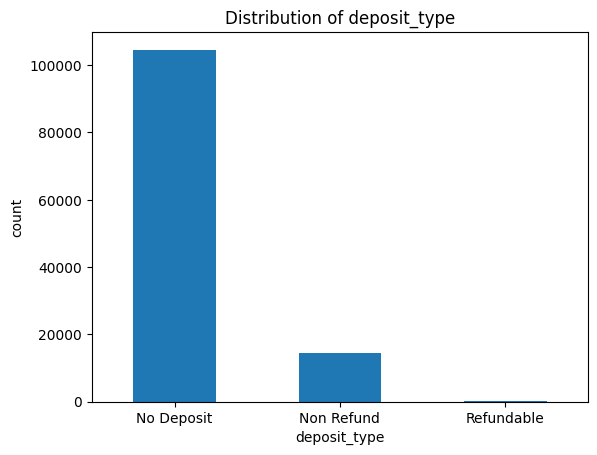

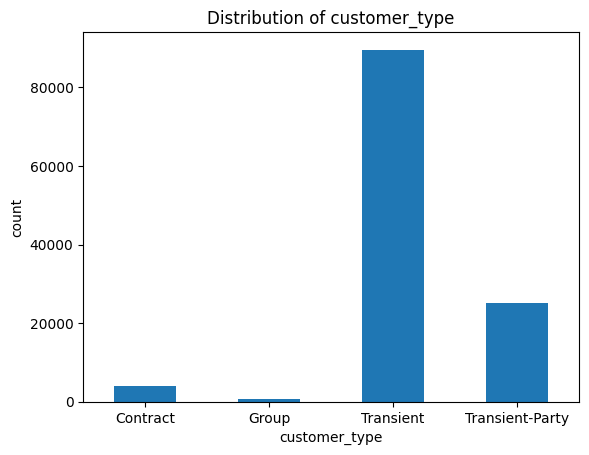

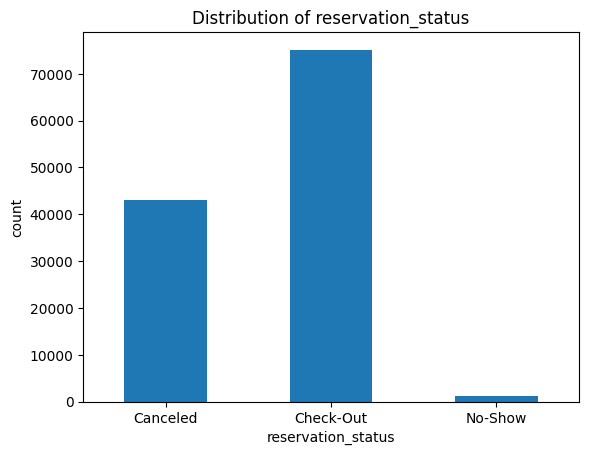

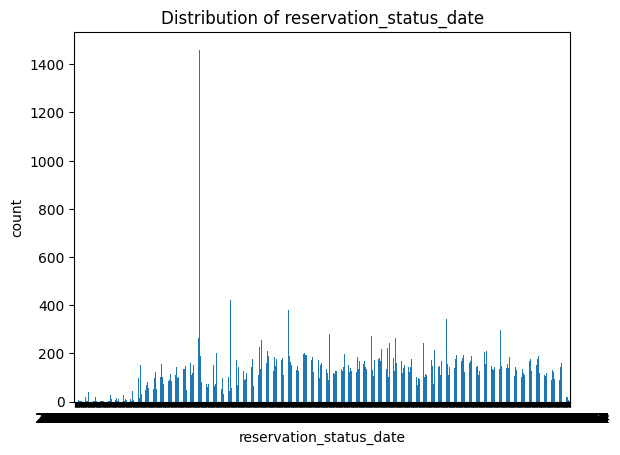

In [23]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

Correlation Analysis.

Correlation matrix of whole dataset

In [24]:

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


Correlation Heatmap plot of whole dataset

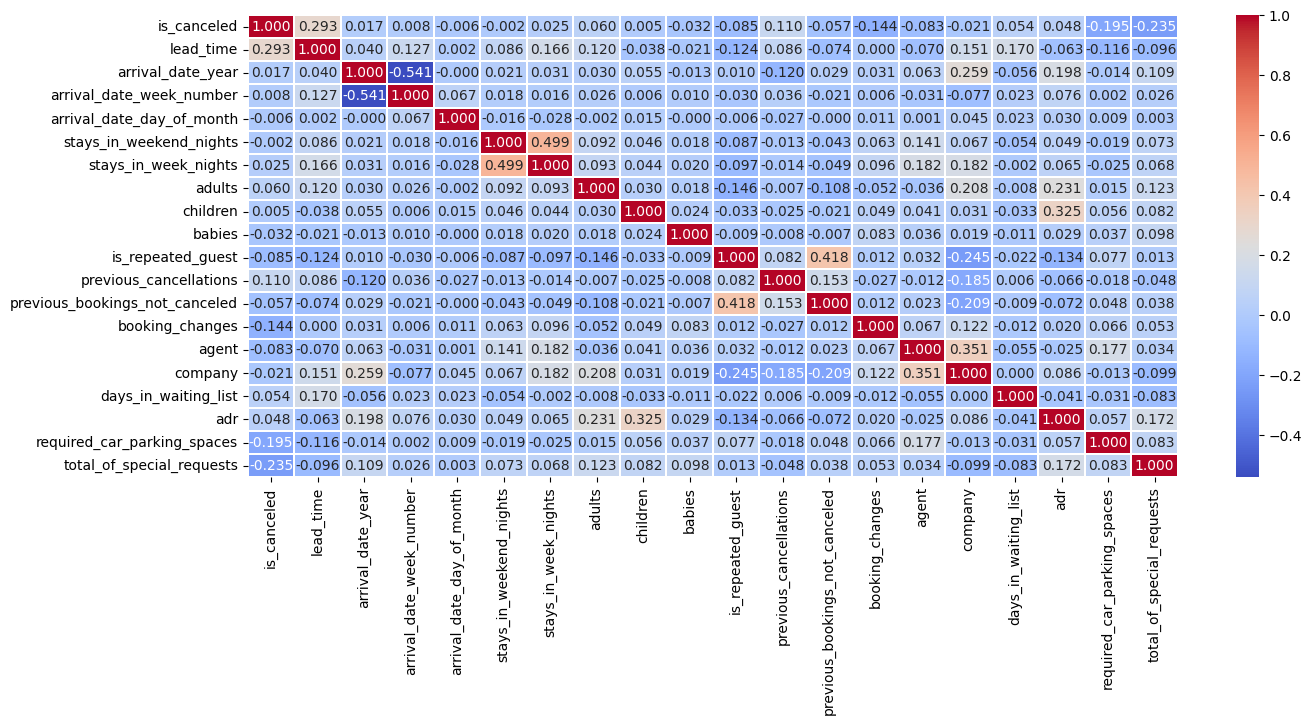

In [25]:
# We use a correlation heatmap to understand how features are related to each other
# and to identify which numerical features have strong relationships with is_canceled
# Select only numerical columns

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

Generating correlation plot between features and target variable using different method

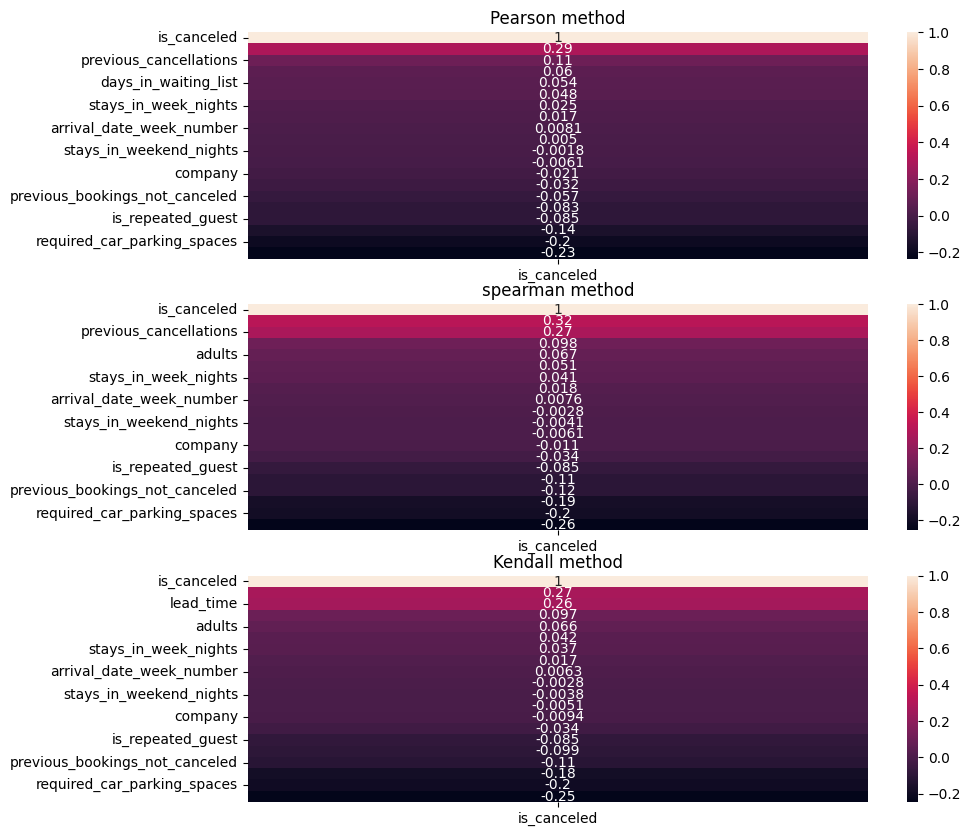

In [26]:
fig, ax = plt.subplots(3,1, figsize=(10, 10))
## Correlation coefficient using different methods
corr1 = numerical_data.corr('pearson')[['is_canceled']].sort_values(by='is_canceled', ascending=False)
corr2 = numerical_data.corr('spearman')[['is_canceled']].sort_values(by='is_canceled', ascending=False)
corr3 = numerical_data.corr('kendall')[['is_canceled']].sort_values(by='is_canceled', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')

## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

Check imbalance in the data
We have classification problem so we need to check the balance of the given data.

In [6]:
#check Imbalance in data ##we check it by class count of target feature

#group instances based on the classes in OUTCOME variable
class_counts=hotel.groupby("is_canceled").size()

columns=['is_canceled','count','percentage']
is_canceled=[0,1]
count=list()
percentage=list()

#Calculate the percentage of each value of the OUTCOME variable from total
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/119390)*100
    percentage.append(percent)

# Convert the calulated values into a dataframe
imbalance_df=pd.DataFrame(list(zip(is_canceled,count,percentage)),columns=columns)
imbalance_df

,is_canceled,count,percentage
0,0,75166,62.958372
1,1,44224,37.041628


Barplot of is_canceled vs Percentage(Bar plot of class count of target feature)

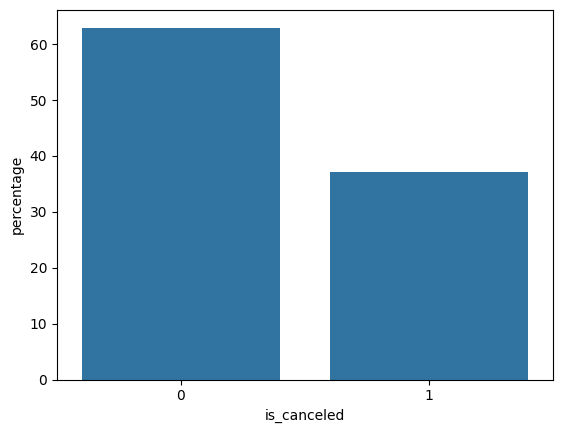

In [7]:
sns.barplot(data=imbalance_df,x=imbalance_df['is_canceled'],y=imbalance_df['percentage'])
plt.show()

Density plots of numerical features

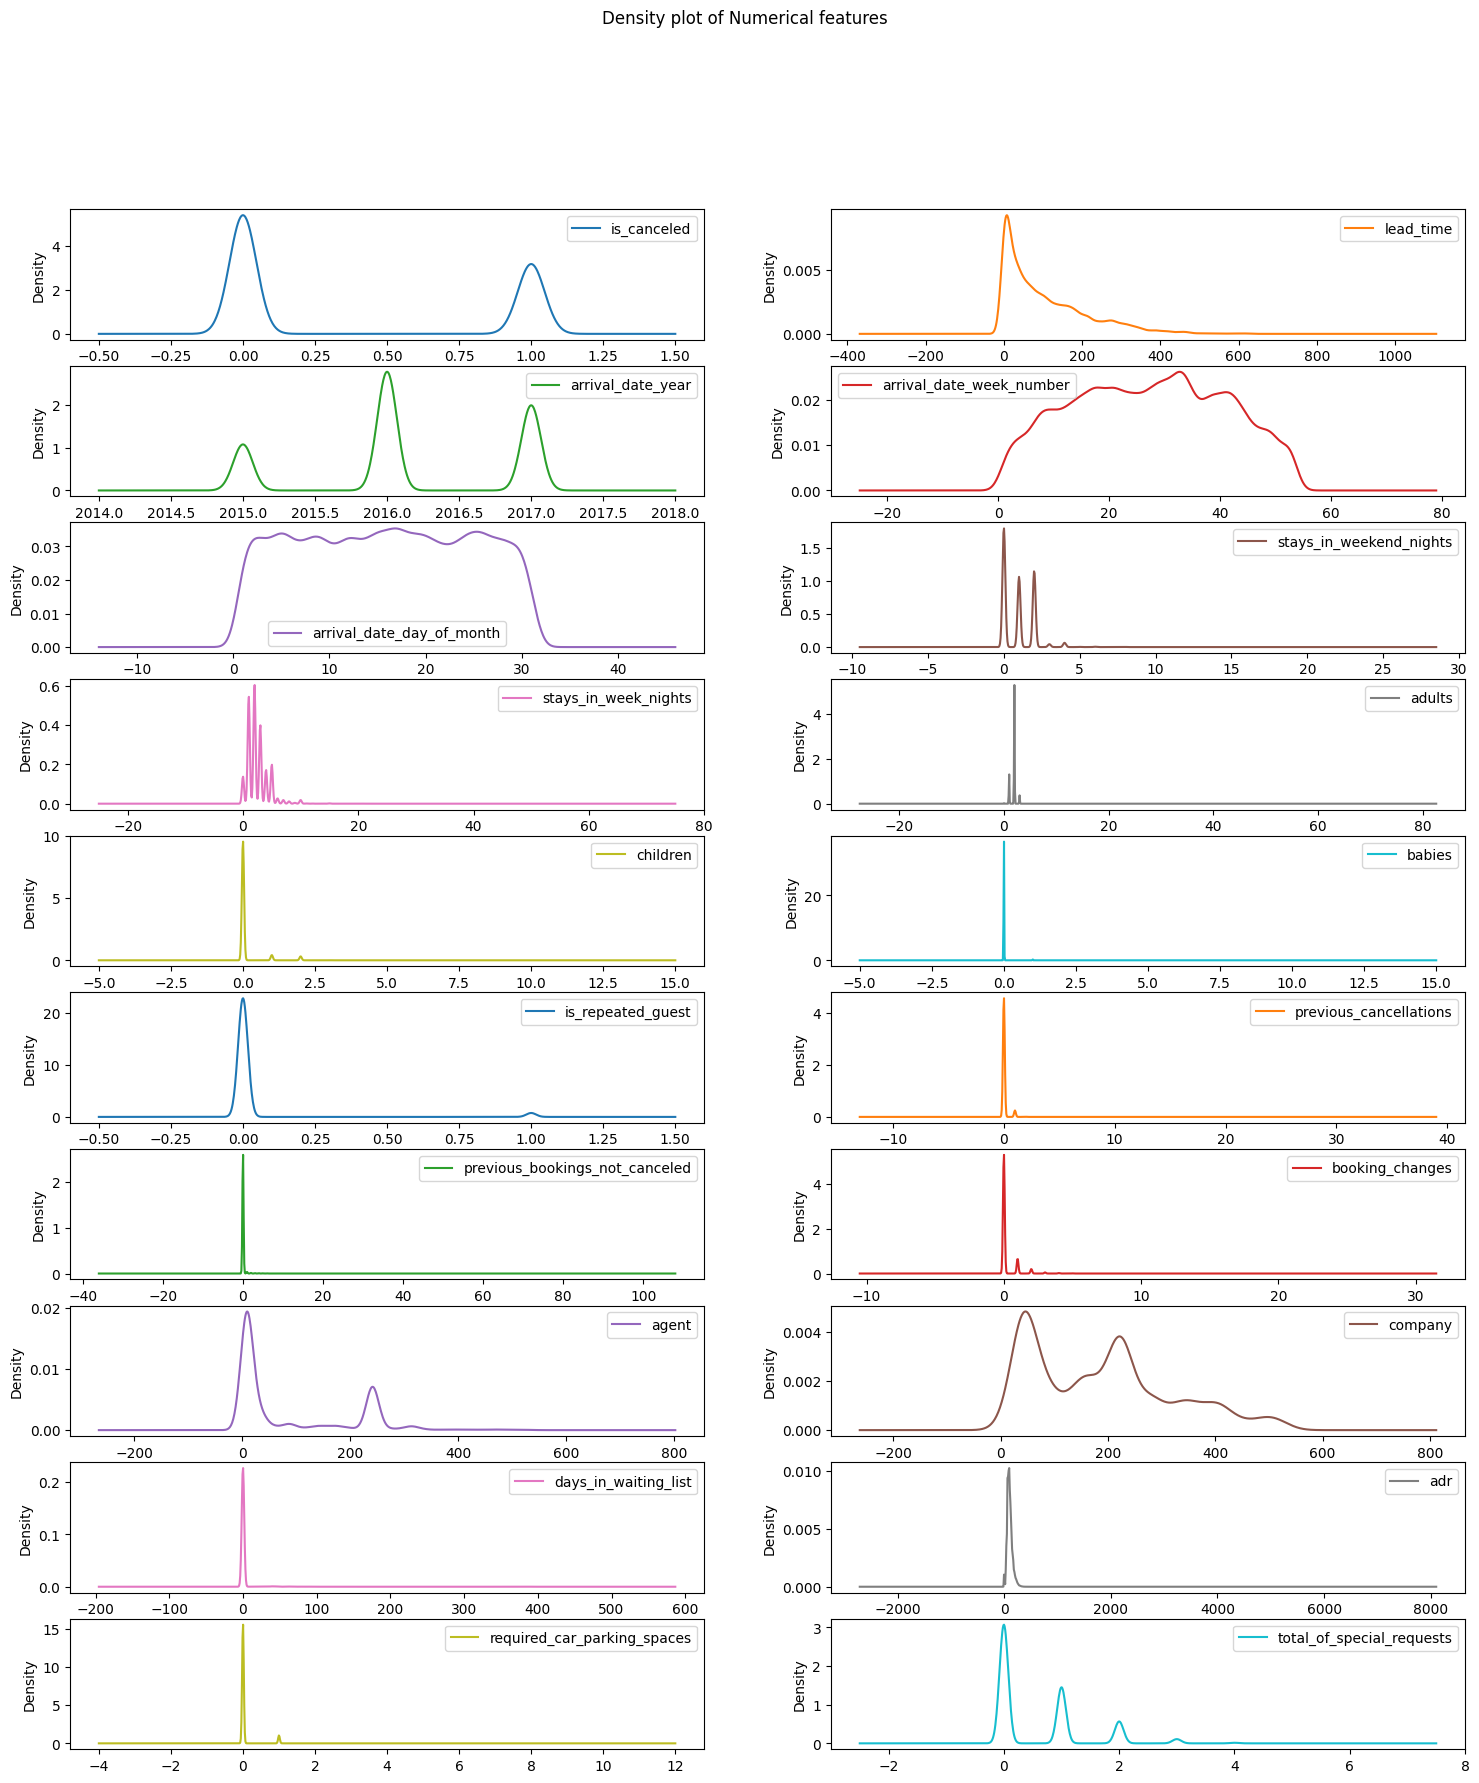

In [29]:
numerical_data.plot(kind='density', figsize=(18,20), subplots=True, layout=(10,2), title="Density plot of Numerical features", sharex=False)
plt.show()


Preprocessing

Remove columns only if they truly have too many null values

Drop rows only when null values are very few; otherwise impute/fill with values

Remove irrelevant columns that don’t affect cancellation prediction

Remove one feature only when correlation is very strong

Handling Null Values

In [30]:
hotel.shape ## before handling the null vales

(119390, 32)

In [31]:
hotel.isnull().sum() #counting the number of null values in the dataframe

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [32]:
##[Columns with majority null values → REMOVE]. company → 112,593 nulls (almost entire column) ;agent → 16,340 nulls (very high)
hotel = hotel.drop(["agent","company"], axis = 1)
hotel.shape

(119390, 30)

In [33]:
##[Columns with few null values → KEEP & HANDLE]. children → 4 nulls → fill with 0 ;country → 488 nulls → fill with most frequent value (mode)
#We don’t remove the 488 rows because:
#488 is very small compared to 119,390 rows (less than 0.5%)
#Removing them would lose useful data, while filling with the most frequent country keeps the dataset intact
#The column country is important for understanding booking behavior
 #So imputation is better than deletion here.

hotel['children'] = hotel['children'].fillna(0) #fillna helps to fill the Null Values (NaN)
hotel['country'] = hotel['country'].fillna(hotel['country'].mode()[0])##Mode is needed because country is categorical, and filling it with the most frequent value keeps the data valid for encoding.


In [34]:
hotel.isnull().sum() #counting the number of null values in the dataframe after handling null

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Remove irrelevant columns that don’t affect cancellation prediction

In [35]:

hotel = hotel.drop(columns=['reservation_status','reservation_status_date','arrival_date_year'])
##reservation_status: It already tells whether the booking was canceled, so using it would make the prediction unfair.so drop
##reservation_status_date: This information is known only after the booking outcome, so it cannot be used to predict cancellation in advance.
##arrival_date_year-Almost constant → low predictive value

Remove one feature only when correlation is very strong(from strong positive co relations)[Dropping column based on correlation]

In [36]:
## we avoid it.Why?
#The correlations are not strong enough to cause serious redundancy.

##Tree-based and neural models handle correlated features well.

##Removing them would not clearly improve cancellation prediction.
##Although some features show correlation, none were removed because the correlation strength was not high enough to negatively impact model performance.

Encode categorical features

In [37]:
# Identify categorical columns##the column who have text val## we need to encode this text val to numerical
categorical_cols = hotel.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object')


In [38]:
###We use One-Hot Encoding because the categorical features are non-hierarchical datas and have no natural order,
##hotel, meal, country, market_segment, deposit_type # Categories have no natural order
# What about arrival_date_month?
#Even though months have an order, we are not modeling time progression here  so Treated as nominal for cancellation prediction
##if there was high to low or rank we would use label encoding


# One-hot encode all categorical columns
hotel_encoded = pd.get_dummies(hotel, drop_first=True)   ##hotel_encoded the new var which we will use later on cause it has encoded values
                                                        #hotel_encoded already has all categorical features converted to number
# Preview the encoded dataset
hotel_encoded.head()   ##output will get true or false



,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,0,0,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,737,27,1,0,0,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,7,27,1,0,1,1,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,13,27,1,0,1,1,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,14,27,1,0,2,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [39]:
hotel_encoded.shape

(119390, 245)

Split the dataset into training and testing sets.
For your hotel_bookings.csv dataset, the best split ratio is:

80% training : 20% testing

Why:

The dataset is large (119k+ rows), so 80% gives enough data for learning.

20% provides a reliable and unbiased evaluation

In [40]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = hotel_encoded.drop('is_canceled', axis=1)#We drop the target variable is_canceled from X because X contains only input features, which are used by the model to learn patterns, while y is the output for which the model is trained to predict.
y = hotel_encoded['is_canceled']     #x,y both are copies of dataframes

# Split the dataset into training and testing sets (80% train, 20% test)
# stratify=y is used because the dataset is imbalanced
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Check the shape of the split datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(95512, 244) (95512,)
(23878, 244) (23878,)


Feature Scaling

Standardization is better because it handles large value differences and outliers more effectively, while Min–Max scaling gets distorted when extreme values exist.
According to your hotel_bookings.csv dataset:

Standardization is used because features like lead_time and adr have large value ranges and outliers, which can distort Min–Max scaling, while StandardScaler keeps the data stable for learning.

Scaler helps to:

Training data: learn scaling parameters and apply them (fit + transform)

Test data: apply the same learned scaling (transform only)


We do NOT scale y.we only scale x
Why (simple):

y is the target label (0 or 1).
Scaling is only for input features (X).
Changing y would break the meaning of the classes
 Scale X only, never y.

In [41]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Check shapes after scaling
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(95512, 244)
(23878, 244)


After scaling, the number of rows and columns does NOT change — only the values are standardized.Here x row col no. are as same as when we did split

Supervised learning models(we give input,otput)

**Model** **training** and predict
For each model:

Train on X_train_scaled, y_train.Model compares its predictions from X_train with y_train to adjust itself and learn the correct patterns.

Predict on X_test_scaled

**Logistic Regression**(simple baseline classification model)
We use Logistic Regression on the hotel dataset because the target is_canceled has two classes (0 or 1).This model predicts the probability of a booking being canceled based on customer and booking features,making it suitable for understanding cancellation behavior and serves as a baseline model to compare with other models.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,precision_score,recall_score,confusion_matrix)

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)  ##iteration=1000  ##sigmoid work(loss func)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Logistic Regression Performance")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("\nConfusion Matrix:\n", cm)


Logistic Regression Performance
Accuracy : 0.8181170952341067
Precision: 0.8120321596894926
Recall   : 0.6622950819672131

Confusion Matrix:
 [[13677  1356]
 [ 2987  5858]]


Decision Tree (non-linear classification model)-We use the Decision Tree model on the hotel dataset because it can capture non-linear relationships between booking features and the target variable is_canceled. This model splits the data based on important decision rules, making it easy to understand how different booking conditions lead to cancellations, and it allows comparison with simpler baseline models like Logistic Regression.

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Print results
print("Decision Tree Performance")
print("Accuracy :", accuracy_dt)
print("Precision:", precision_dt)
print("Recall   :", recall_dt)
print("\nConfusion Matrix:\n", cm_dt)


Decision Tree Performance
Accuracy : 0.8451712873775024
Precision: 0.7896691424713032
Recall   : 0.7933295647258338

Confusion Matrix:
 [[13164  1869]
 [ 1828  7017]]


K-Nearest Neighbors (distance-based classification model)-We use knn because on hotel csv because This model uses distance between customer and booking features to predict whether a booking will be canceled, making it useful for capturing local patterns in cancellation behavior and comparing performance with other classification models.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using scaled training data
knn.fit(X_train_scaled, y_train)

# Predict on scaled test data
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Print results
print("KNN Performance")
print("Accuracy :", accuracy_knn)
print("Precision:", precision_knn)
print("Recall   :", recall_knn)
print("\nConfusion Matrix:\n", cm_knn)


KNN Performance
Accuracy : 0.8226819666638747
Precision: 0.7726788882318155
Recall   : 0.7386093838326738

Confusion Matrix:
 [[13111  1922]
 [ 2312  6533]]


Neural Network (deep learning classification model)
We use a Neural Network on the hotel dataset because it can learn complex and non-linear patterns from customer and booking features. This model **combines multiple features through hidden layers** to predict whether a booking will be canceled, making it effective for capturing relationships that simpler models may miss and for comparing performance with traditional classifiers.

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize Neural Network model
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=20, random_state=42)  ##hidden layer=2 iteration=20

# Train the model using scaled training data
nn.fit(X_train_scaled, y_train)

# Predict on scaled test data
y_pred_nn = nn.predict(X_test_scaled)   #Activation function-MLPClassifier uses ReLU (Rectified Linear Unit) by default.

# Evaluation metrics                    ##if relu founds pos val then keeps it as it is,if it founds neg then turns it to 0
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Print results
print("Neural Network Performance")
print("Accuracy :", accuracy_nn)
print("Precision:", precision_nn)
print("Recall   :", recall_nn)
print("\nConfusion Matrix:\n", cm_nn)


Neural Network Performance
Accuracy : 0.8609598793868833
Precision: 0.8407549031700999
Recall   : 0.7706048615036744

Confusion Matrix:
 [[13742  1291]
 [ 2029  6816]]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Compare supervised models according
1)Bar chart showcasing prediction accuracy of all models
2)Precision, recall comparison of each model
3)Confusion Matrix
4)AUC score, ROC curve for each model

 1)Bar chart showcasing prediction accuracy of all models

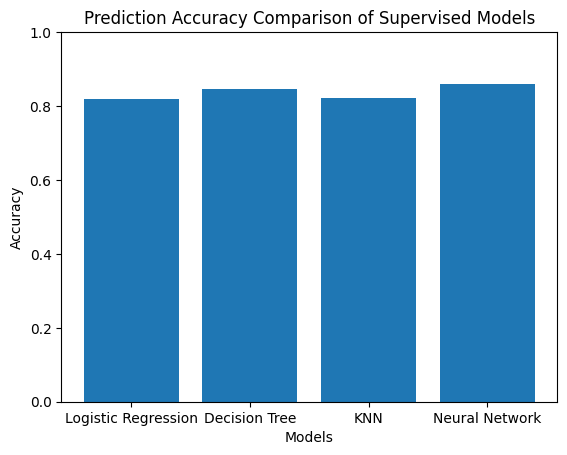

In [46]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Neural Network']

# Accuracy scores from trained models
accuracy_scores = [
    accuracy,        # Logistic Regression accuracy
    accuracy_dt,     # Decision Tree accuracy
    accuracy_knn,    # KNN accuracy
    accuracy_nn      # Neural Network accuracy
]

# Create bar chart
plt.figure()
plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy Comparison of Supervised Models')
plt.ylim(0, 1)
plt.show()





Precision, recall comparison of each


precision-if a model predicts that there will be cancelletation ,then what percentage it predicted right

recall-in target column out of canceled(val=1) rows how many cancel values the model could actually found

F1 score-harmonic mean  of precision and recall(usefull when data imbalaned)

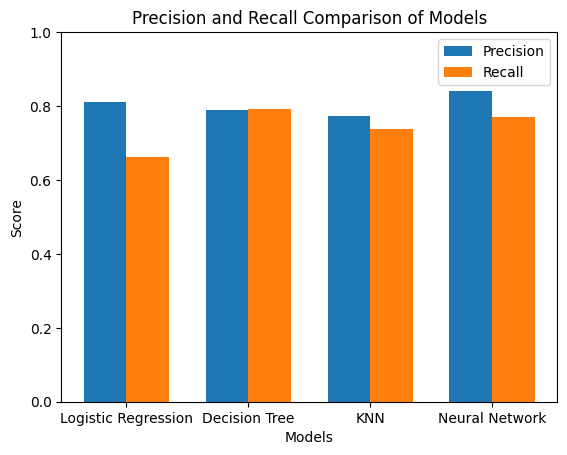

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Neural Network']

# Precision and Recall values from trained models
precision_scores = [
    precision,        # Logistic Regression
    precision_dt,     # Decision Tree
    precision_knn,    # KNN
    precision_nn      # Neural Network
]

recall_scores = [
    recall,           # Logistic Regression
    recall_dt,        # Decision Tree
    recall_knn,       # KNN
    recall_nn         # Neural Network
]

# Bar positions
x = np.arange(len(models))
width = 0.35

# Create bar chart
plt.figure()
plt.bar(x - width/2, precision_scores, width, label='Precision')
plt.bar(x + width/2, recall_scores, width, label='Recall')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Precision and Recall Comparison of Models')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()

plt.show()


A Confusion Matrix is a table that shows how many predictions a model got right and wrong.It compares actual values with predicted values, showing true positives, true negatives, false positives, and false negatives.
This helps understand where the model makes mistakes, not just how accurate it is

##In column matrix
##Top left(true neg) : predicted stay and actually stayed

##Bottom right(true pos) predicted left and actually left
##Top right(false pos): predicted leave but stayed

##Bottom left( false neg):predicted they would stay but left


diagonal valueare best

Logistic Regression

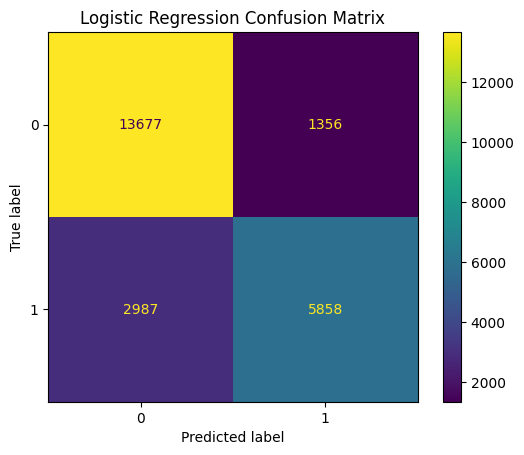

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_log = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_log, display_labels=[0, 1]).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()
               ##in pic Your problem is binary classification (is_canceled = 0 or 1).
                ##So the confusion matrix is always 2 × 2, which means 4 slots only.





Decision Tree

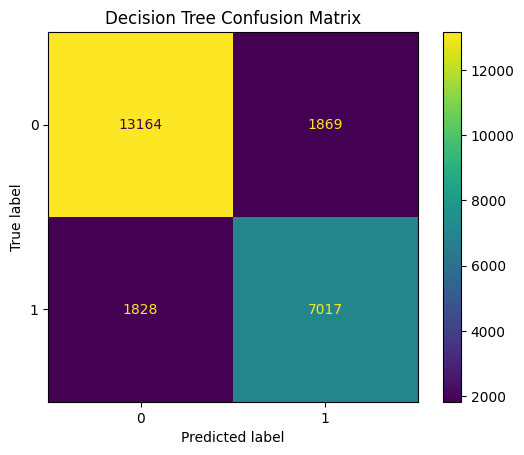

In [49]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt, display_labels=[0, 1]).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()


KNN

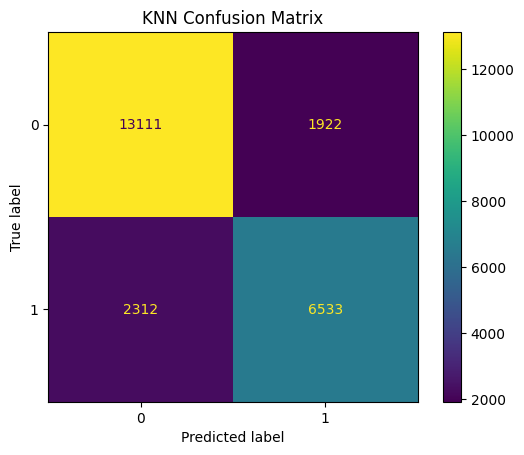

In [50]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=[0, 1]).plot()
plt.title("KNN Confusion Matrix")
plt.show()


Neural Network

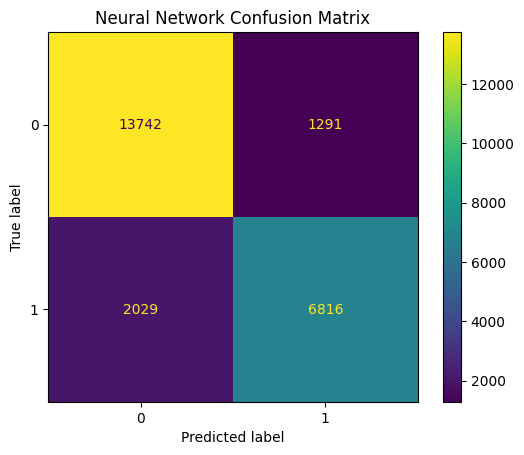

In [51]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn, display_labels=[0, 1]).plot()
plt.title("Neural Network Confusion Matrix")
plt.show()



ROC Curve: It’s a plot of True Positive Rate (TPR) vs False Positive Rate (FPR) at various threshold settings.
AUC (Area Under the Curve): It tells how much the model is capable of distinguishing between classes.

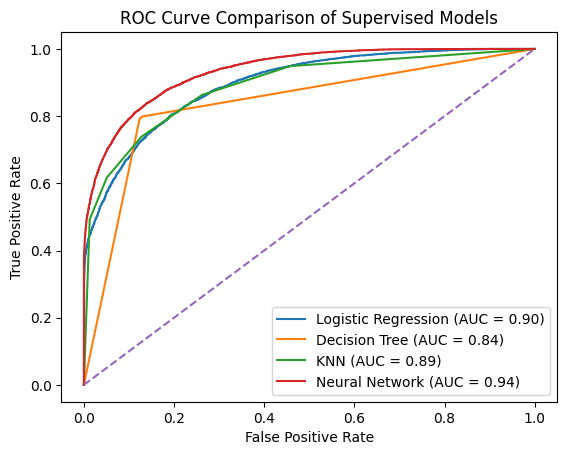

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability scores (required for ROC)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
y_prob_dt = dt.predict_proba(X_test)[:, 1]
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
y_prob_nn = nn.predict_proba(X_test_scaled)[:, 1]

# ROC curve values
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

# AUC scores
auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_knn = auc(fpr_knn, tpr_knn)
auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curves  of all models to compare
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Supervised Models')
plt.legend()
plt.show()


Unsupervised Learning – K-Means Clustering

Remove the target column is_canceled
→ K-Means does NOT use labels.

Use scaled feature data
→ K-Means is distance-based.

Choose number of clusters (k)
→ Use Elbow Method (recommended).

Apply K-Means clustering

Visualize clusters (2D using PCA or explain cluster sizes)

Interpret clusters
→ e.g., high-risk bookings vs low-risk bookings.

In [53]:
# Drop target column (K-Means does not use labels)
X_kmeans = hotel_encoded.drop('is_canceled', axis=1)

# Use the scaled version of features
X_kmeans_scaled = scaler.transform(X_kmeans)


Elbow method-The Elbow Method is used to choose the best number of clusters (k) for K-Means.

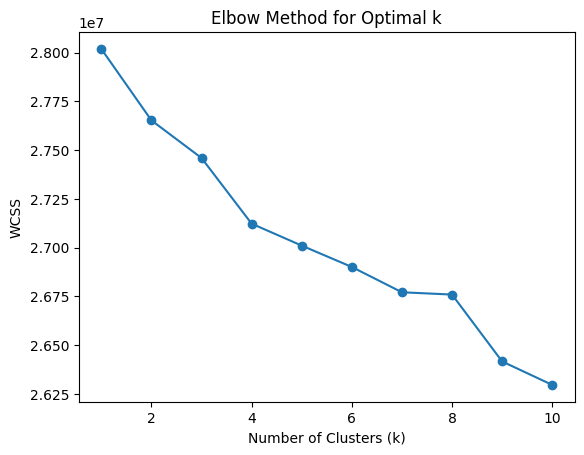

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Try k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)  ##k=nu of  group ofclusturs
    kmeans.fit(X_kmeans_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


k = 4 optimal k
There is a sharp drop in WCSS from k = 1 → 4

K-Means Clustering

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)  ##k=4
cluster_labels = kmeans.fit_predict(X_kmeans_scaled)

hotel_clusters = X_kmeans.copy()
hotel_clusters['Cluster'] = cluster_labels

hotel_clusters['Cluster'].value_counts()

cluster_summary = hotel_clusters.groupby('Cluster').mean()
cluster_summary.head()


,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
Cluster,,,,,,,,,,,,,,,,,,,,,
0,138.246346,28.563707,15.840641,0.915030,2.510601,1.715244,0.018073,0.002964,0.019349,0.049730,...,0.001029,0.004570,0.002223,0.000000,0.000041,0.011156,0.005763,0.010951,0.016920,0.906673
1,215.094542,27.447574,15.534367,0.623113,2.093666,1.818261,0.000135,0.000000,0.004447,0.483423,...,0.000067,0.000000,0.000000,0.000000,0.000000,0.960243,0.000000,0.000000,0.892385,0.060175
2,39.821998,26.582638,15.890303,0.739564,2.083367,1.690058,0.138420,0.019441,0.155467,0.073676,...,0.011676,0.004495,0.002977,0.000058,0.000525,0.003269,0.000234,0.009107,0.911845,0.077121
3,82.142674,26.718723,15.818977,1.055029,2.705053,1.964819,0.151925,0.008617,0.009678,0.011991,...,0.007698,0.002772,0.002756,0.000000,0.000032,0.000158,0.000285,0.002455,0.955805,0.014035


Apply PCA (2D)

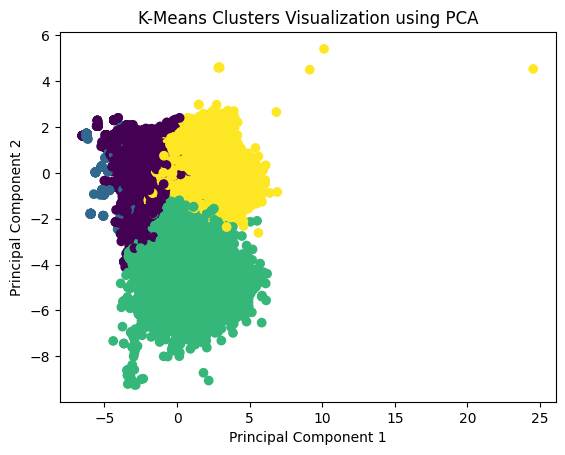

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_kmeans_scaled)


plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters Visualization using PCA')
plt.show()
